# **Reconnaissance des caractères arabes manuscrits avec réseau neuronal**


## 1- Préparation des données

### 1-1 Chargement de données

In [31]:
# Importer la bibliothèque "drive" de Google Colab
from google.colab import drive

# Monter le lecteur Google Drive sur le système de fichiers de Colab
drive.mount('/content/drive')

# Une fois que la commande ci-dessus est exécutée, un lien est généré
# permettant d'accéder au compte Google Drive. Ce lien doit être suivi,
# une autorisation doit être accordée et le code de vérification doit être copié.
# Ce code de vérification doit ensuite être collé dans la zone de saisie qui apparaît
# dans la sortie de la commande ci-dessus. Cela permet de monter le lecteur Google Drive
# sur le système de fichiers de Colab, en créant un lien symbolique vers le dossier "My Drive"
# du compte Google Drive de l'utilisateur. 

# Le chemin d'accès "/content/drive" peut maintenant être utilisé pour accéder
# aux fichiers du lecteur Google Drive monté.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Importer la bibliothèque "pandas" pour lire les fichiers CSV contenant les données
import pandas as pd

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
arabic_characters = ['alif', 'bae', 'tae', 'thae', 'jim', 'hae', 'khaa', 'dal', 'dhal',
                    'rae', 'zain', 'sin', 'chin', 'sad', 'dad', 'tae', 'zain', 'aain',
                    'ghain', 'fae', 'qaf', 'kaf', 'lam', 'mim', 'noun', 'hae', 'waw', 'yae']
# arabic_characters= list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
len(arabic_characters)

28

In [34]:
import pandas as pd

# Charger les données d'entraînement à partir d'un fichier CSV dans un dataframe Pandas
x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP_FAS/csvTrainImages 13440x1024.csv",header=None)

# Charger les données de test à partir d'un fichier CSV dans un dataframe Pandas
x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP_FAS/csvTestImages 3360x1024.csv",header=None)

# Charger les étiquettes d'entraînement à partir d'un fichier CSV dans un dataframe Pandas
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP_FAS/csvTrainLabel 13440x1.csv",header=None)

# Charger les étiquettes de test à partir d'un fichier CSV dans un dataframe Pandas
y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP_FAS/csvTestLabel 3360x1.csv",header=None)

# "header=None" signifie que le fichier CSV n'a pas de ligne d'en-tête

In [35]:
# Affichage du contenu
# x_train.head()
# x_test.head()
# y_train.head()
# y_test.head()

### 1-2 Nettoyage des données

**cela juste pour verefier les données**

In [36]:
# Vérifier s'il y a des valeurs manquantes dans le dataframe x_train
# La méthode isnull() renvoie un dataframe de booléens qui indique si chaque élément est nul (True) ou non (False)
# La méthode sum() renvoie le nombre de valeurs nulles pour chaque colonne
# Le résultat est un dataframe de la même forme que x_train, où chaque colonne contient le nombre de valeurs nulles dans la colonne correspondante
x_train.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Length: 1024, dtype: int64

In [37]:
# Calculer le nombre total de valeurs manquantes dans le dataframe x_train
# La méthode sum() renvoie la somme de toutes les valeurs de la dataframe
x_train.isnull().sum().sum()

0

In [38]:
# Vérifier s'il y a des valeurs manquantes dans le dataframe x_test
# La méthode isnull() renvoie un dataframe de booléens qui indique si chaque élément est nul (True) ou non (False)
# La méthode sum() renvoie le nombre de valeurs nulles pour chaque colonne
# Le résultat est un dataframe de la même forme que x_test, où chaque colonne contient le nombre de valeurs nulles dans la colonne correspondante
x_test.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Length: 1024, dtype: int64

In [39]:
# Calculer le nombre total de valeurs manquantes dans le dataframe x_test
# La méthode sum() renvoie la somme de toutes les valeurs de la dataframe
x_test.isnull().sum().sum()

0

In [40]:
# Afficher la forme (nombre de lignes et de colonnes) du dataframe y_train
# La forme de y_train doit correspondre au nombre d'images dans le dataframe x_train
y_train.shape

(13440, 1)

In [41]:
# Convertir les dataframes x_train, x_test, y_train et y_test en tableaux NumPy pour une utilisation dans le modèle de deep learning
# La méthode to_numpy() renvoie un tableau NumPy contenant les mêmes données que le dataframe
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

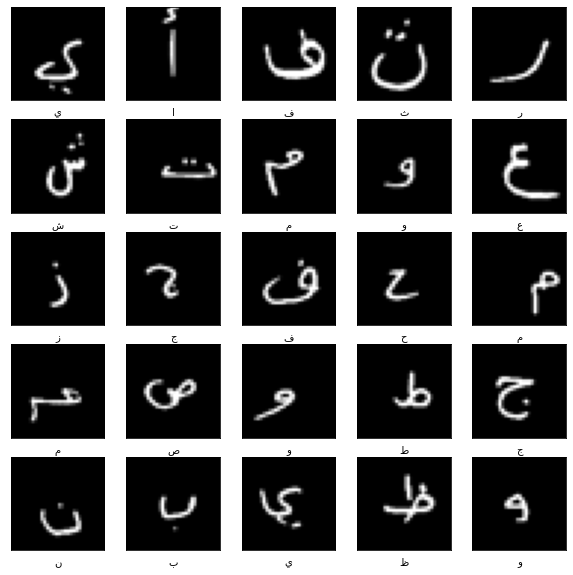

In [42]:
# # Affichage de la forme des données d'entraînement
# print(x_train.shape)

# # Affichage de la forme des données de sortie d'entraînement
# print(y_train.shape)

# # Affichage de la forme des données d'entrée de test
# print(x_test.shape)

# # Affichage de la forme des données de sortie de test
# print(y_test.shape)

# Normalisation des données
x_train = x_train / 255
x_test = x_test / 255

# Réarrangement des données
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

# Affichage de plusieurs images d'exemples
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])-1])
plt.show()

In [43]:
# Encodage one-hot des étiquettes
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Vérification des dimensions
x_train.shape
y_train.shape

# Affichage d'un exemple d'étiquette encodée
y_train[0]

# Nombre de classes
len(y_train[0])

# Suppression de la première colonne d'encodage
y_train = y_train[:,1:]
y_test = y_test[:,1:]

# Vérification des dimensions après suppression
len(y_train[0])

28

## 2- le modèle CNN

In [44]:
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# Ajouter les couches du modèle
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

# Compiler le modèle en définissant les paramètres d'optimisation et de métriques
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
420/420 [==============================] - 3s 4ms/step - loss: 2.0504 - accuracy: 0.3827
Epoch 2/10
420/420 [==============================] - 2s 4ms/step - loss: 1.0918 - accuracy: 0.6533
Epoch 3/10
420/420 [==============================] - 2s 5ms/step - loss: 0.7954 - accuracy: 0.7467
Epoch 4/10
420/420 [==============================] - 1s 4ms/step - loss: 0.6547 - accuracy: 0.7969
Epoch 5/10
420/420 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.8182
Epoch 6/10
420/420 [==============================] - 1s 3ms/step - loss: 0.4974 - accuracy: 0.8391
Epoch 7/10
420/420 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.8478
Epoch 8/10
420/420 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8675
Epoch 9/10
420/420 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8690
Epoch 10/10
420/420 [==============================] - 2s 4ms/step - loss: 0.3725 - accuracy: 0.8786

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1152)             

extrait de code montre l'architecture du modèle de réseau de neurones convolutifs. Le modèle est de type séquentiel, ce qui signifie que les couches sont empilées les unes sur les autres.

Le modèle contient cinq couches différentes: deux couches de convolution, deux couches de mise en commun (MaxPooling2D), une couche de "flatten" et une couche dense. Les paramètres de chaque couche sont affichés dans la colonne "Param #".

La première couche de convolution a un noyau de taille 3x3 avec 64 filtres. La forme de sortie de cette couche est (None, 30, 30, 64), ce qui signifie qu'elle produit 64 cartes de caractéristiques (features maps) de taille 30x30.

La première couche de mise en commun est de taille 2x2 et réduit la taille de chaque carte de caractéristiques de moitié, produisant ainsi une sortie de taille (None, 15, 15, 64).

La deuxième couche de convolution a un noyau de taille 3x3 avec 32 filtres et produit une sortie de taille (None, 13, 13, 32).

La deuxième couche de mise en commun est également de taille 2x2 et produit une sortie de taille (None, 6, 6, 32).

La couche de "flatten" prend en entrée les cartes de caractéristiques de la couche précédente et les transforme en un vecteur à une seule dimension de taille 1152.

La couche de dropout est utilisée pour éviter le surapprentissage (overfitting) et elle supprime aléatoirement 50% des neurones de la couche précédente.

La couche dense est la couche de sortie et contient 28 neurones avec une fonction d'activation softmax. Cette couche produit une distribution de probabilité sur les 28 classes possibles.

La dernière partie de la sortie montre le nombre total de paramètres dans le modèle et le nombre de paramètres entraînables. Les paramètres entraînables sont ceux qui seront mis à jour pendant l'entraînement du modèle pour minimiser la perte (loss) définie par la fonction de perte (loss function).

In [46]:
model.evaluate(x_test,y_test)

105/105 [==============================] - 1s 4ms/step - loss: 0.3223 - accuracy: 0.9077


[0.3223394751548767, 0.9077380895614624]

## 3- Augmentation des données

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
epochs = 100
batch_size = 32 

# Construire un générateur d'images d'entraînement pour l'augmentation des données
datagen = ImageDataGenerator(
    featurewise_center=False,# Définir la moyenne d'entrée sur 0 pour l'ensemble de données
    samplewise_center=False, # Définir la moyenne de chaque échantillon sur 0
    featurewise_std_normalization=False, # Diviser les entrées par l'écart type de l'ensemble de données
    samplewise_std_normalization=False, # Diviser chaque entrée par son écart type
    zca_whitening=False, # Appliquer le blanchiment ZCA
    rotation_range=10, # Faire pivoter les images de manière aléatoire dans la plage (en degrés, de 0 à 180)
    zoom_range=0.1, # Effectuer un zoom aléatoire sur l'image
    width_shift_range=0.1,# Déplacer de manière aléatoire les images horizontalement (fraction de la largeur totale)
    height_shift_range=0.1,# Déplacer de manière aléatoire les images verticalement (fraction de la hauteur totale)
    horizontal_flip=False, # Retourner les images de manière aléatoire horizontalement
    vertical_flip=False) # Retourner les images de manière aléatoire verticalement

In [19]:
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [20]:
history = model.fit(train_gen, epochs=epochs,
                             steps_per_epoch=x_train.shape[0]//batch_size,
                             validation_data=test_gen,
                             validation_steps=x_test.shape[0]//batch_size)

Epoch 1/100
420/420 [==============================] - 7s 16ms/step - loss: 0.8059 - accuracy: 0.7551 - val_loss: 0.6426 - val_accuracy: 0.8071
Epoch 2/100
420/420 [==============================] - 7s 18ms/step - loss: 0.7175 - accuracy: 0.7790 - val_loss: 0.5358 - val_accuracy: 0.8432
Epoch 3/100
420/420 [==============================] - 8s 18ms/step - loss: 0.6715 - accuracy: 0.7929 - val_loss: 0.5106 - val_accuracy: 0.8470
Epoch 4/100
420/420 [==============================] - 6s 15ms/step - loss: 0.6347 - accuracy: 0.8023 - val_loss: 0.4541 - val_accuracy: 0.8640
Epoch 5/100
420/420 [==============================] - 8s 18ms/step - loss: 0.6204 - accuracy: 0.8100 - val_loss: 0.4760 - val_accuracy: 0.8577
Epoch 6/100
420/420 [==============================] - 7s 16ms/step - loss: 0.5939 - accuracy: 0.8097 - val_loss: 0.4336 - val_accuracy: 0.8753
Epoch 7/100
420/420 [==============================] - 7s 18ms/step - loss: 0.5708 - accuracy: 0.8196 - val_loss: 0.4007 - val_accuracy:

## 4- Courbes d'entraînement et de validation

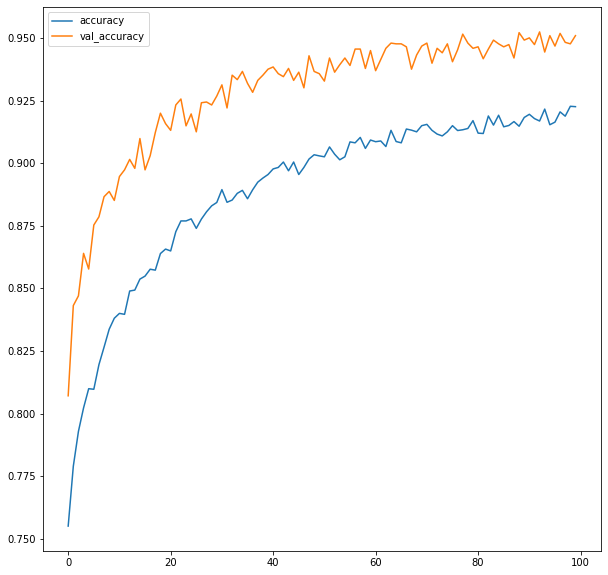

In [47]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history["val_accuracy"], label='Validation accuracy')
plt.legend(["accuracy","val_accuracy"])
plt.show()

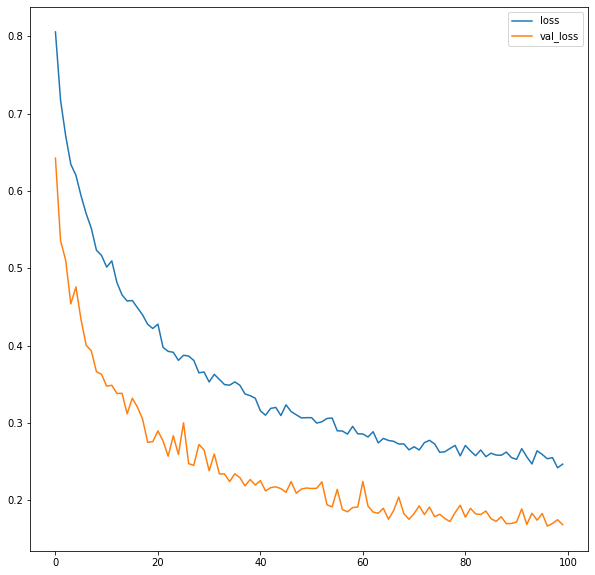

In [48]:
plt.figure(figsize=(10,10))
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], label='Validation loss')
plt.legend(["loss","val_loss"])
plt.show()

## 5- Matrice de confusion

In [49]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

105/105 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Truth')

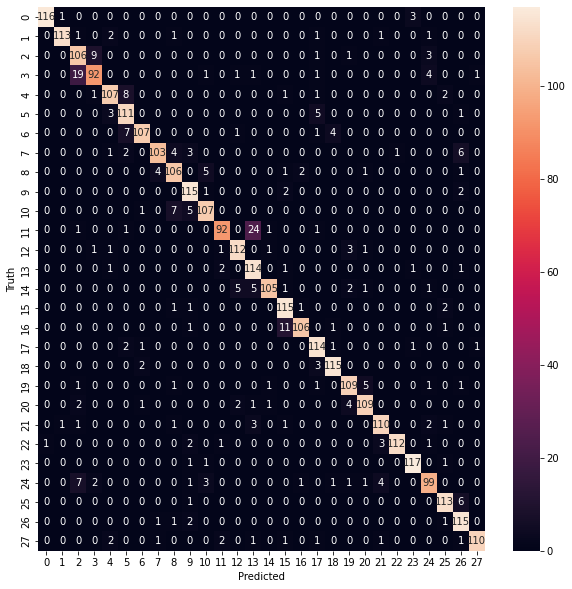

In [50]:
# Prédire les valeurs à partir de l'ensemble de validation
y_preds = model.predict(x_test)
# Convertir les classes de prédictions en vecteurs one-hot
y_pred_classes = np.argmax(y_preds, axis=1)
# Convertir les observations de validation en vecteurs one-hot
y_true = np.argmax(y_test, axis=1)
# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 6- Reconnaissance des caractères manuscrits avec openCV2

In [51]:
import argparse
import imutils
from imutils.contours import sort_contours
import cv2 as cv
from keras.models import load_model

In [ ]:
!pip install arabic_reshaper

In [ ]:
!pip install python-bidi

1/1 [==============================] - 0s 21ms/step


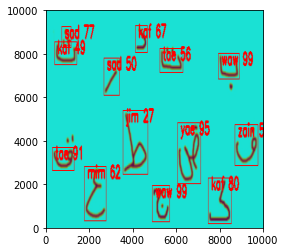

In [63]:
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/TP_FAS/test.PNG")
kernel = np.ones((5,5),dtype=np.uint8)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
(T, thresh) = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(thresh)
erodation = cv.erode(thresh,kernel,iterations = 1)
plt.imshow(erodation)
blurred = cv.GaussianBlur(erodation, (5,5), 0)
plt.imshow(blurred)
edged = cv.Canny(blurred, 30, 150)
# Depuis OpenCV 3.2, findContours() ne modifie plus l'image source.
cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

# initialise la liste des boîtes englobantes de contour et associées
# caractères que nous allons utiliser pour l'OCR
chars = []
plt.imshow(edged)
for c in cnts:
    # calcule la boite englobante du contour
    (x, y, w, h) = cv.boundingRect(c)

    # filtrer les boîtes englobantes, en s'assurant qu'elles ne sont pas trop petites
    # ni trop grand
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
         # extraire le caractère et le seuiller pour créer le caractère
         # apparaissent en *blanc* (premier plan) sur un fond *noir*, puis
         # saisir la largeur et la hauteur de l'image seuillée
        roi = gray[y:y + h, x:x + w]
        thresh = cv.threshold(roi, 0, 255,
            cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape

         # si la largeur est supérieure à la hauteur, redimensionner le long de la
         # dimension de largeur
        if tW > tH:
            thresh = imutils.resize(thresh, width=32)
        # sinon, redimensionner le long de la hauteur
        else:
            thresh = imutils.resize(thresh, height=32)

         # récupérez les dimensions de l'image (maintenant qu'elle a été redimensionnée)
         # puis déterminez de combien nous avons besoin pour remplir la largeur et
         # hauteur telle que notre image soit 32x32
        (tH, tW) = thresh.shape
        dX = int(max(0, 32 - tW) / 2.0)
        dY = int(max(0, 32 - tH) / 2.0)

        # remplir l'image et forcer les dimensions 32x32
        padded = cv.copyMakeBorder(thresh, top=dY, bottom=dY,
            left=dX, right=dX, borderType=cv.BORDER_CONSTANT,
            value=(0, 0, 0))
        padded = cv.resize(padded, (32, 32))

        # préparer l'image rembourrée pour la classification via notre
        # modèle d'OCR d'écriture manuscrite
        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)

        # mettre à jour notre liste de caractères qui seront OCR
        chars.append((padded, (x, y, w, h)))
# extraire les emplacements des boîtes englobantes et les caractères rembourrés
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR les caractères à l'aide de notre modèle de reconnaissance de l'écriture manuscrite
preds = model.predict(chars)
# définir la liste des noms d'étiquettes
labelNames = arabic_characters
# boucle sur les prédictions et les emplacements des boîtes englobantes ensemble
for (pred, (x, y, w, h)) in zip(preds, boxes):
     # trouver l'index de l'étiquette avec le plus grand correspondant
     # probabilité, puis extraire la probabilité et l'étiquette
    i = np.argmax(pred)
    prob = pred[i]
    secLabel = " %.0f"%(prob * 100)
    label = labelNames[i]+secLabel
   
    # dessine la prédiction sur l'image
    # print("{} - {:.2f}%".format(label, prob * 100))
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
    cv.putText(img, label, (x + 7 , y +12), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
   
    # show the image
    #cv.imshow("Image", image)
    #cv.waitKey(0)
    
    plt.imshow(img,extent=[0, 10000, 0, 10000])

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/TP_FAS/modelcharacters.h5")